In [88]:
import pandas as pd
import numpy as np
import regex as re
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import seaborn as sns

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bnsla\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [176]:
df = pd.read_csv("Tweets.csv")

In [177]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [178]:
df

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14635,569587686496825344,positive,0.3487,NaN,0.0000,American,NaN,KristenReenders,NaN,0,@AmericanAir thank you we got on a different f...,NaN,2015-02-22 12:01:01 -0800,NaN,NaN
14636,569587371693355008,negative,1.0000,Customer Service Issue,1.0000,American,NaN,itsropes,NaN,0,@AmericanAir leaving over 20 minutes Late Flig...,NaN,2015-02-22 11:59:46 -0800,Texas,NaN
14637,569587242672398336,neutral,1.0000,NaN,NaN,American,NaN,sanyabun,NaN,0,@AmericanAir Please bring American Airlines to...,NaN,2015-02-22 11:59:15 -0800,"Nigeria,lagos",NaN
14638,569587188687634433,negative,1.0000,Customer Service Issue,0.6659,American,NaN,SraJackson,NaN,0,"@AmericanAir you have my money, you change my ...",NaN,2015-02-22 11:59:02 -0800,New Jersey,Eastern Time (US & Canada)


In [179]:
df["airline_sentiment"].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [180]:
df = df[["text","airline_sentiment"]]

In [181]:
df = df[df["airline_sentiment"] != 'neutral']

In [182]:
df_pos = df[df["airline_sentiment"] == 'positive']
df_neg = df[df["airline_sentiment"] == 'negative']

In [184]:
df_neg = df_neg.sample(2363)

In [186]:
df = pd.concat([df_pos,df_neg])

In [187]:
df

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,positive
6,"@VirginAmerica yes, nearly every time I fly VX...",positive
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",positive
9,"@VirginAmerica it was amazing, and arrived an ...",positive
11,@VirginAmerica I &lt;3 pretty graphics. so muc...,positive
...,...,...
13734,@AmericanAir I've been on hold with internatio...,negative
8862,@JetBlue \nApparently not.,negative
10572,@USAirways Sadly your words don't represent yo...,negative
2207,@united and waiting,negative


In [188]:
encoder = LabelEncoder()

In [189]:
df['airline_sentiment'] = encoder.fit_transform(df['airline_sentiment'])

In [190]:
df

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,1
6,"@VirginAmerica yes, nearly every time I fly VX...",1
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",1
9,"@VirginAmerica it was amazing, and arrived an ...",1
11,@VirginAmerica I &lt;3 pretty graphics. so muc...,1
...,...,...
13734,@AmericanAir I've been on hold with internatio...,0
8862,@JetBlue \nApparently not.,0
10572,@USAirways Sadly your words don't represent yo...,0
2207,@united and waiting,0


In [191]:
df.isnull().sum()

text                 0
airline_sentiment    0
dtype: int64

In [192]:
df.duplicated().sum()

74

In [193]:
df = df.drop_duplicates(keep = 'first')

In [194]:
df

,text,airline_sentiment
1,@VirginAmerica plus you've added commercials t...,1
6,"@VirginAmerica yes, nearly every time I fly VX...",1
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",1
9,"@VirginAmerica it was amazing, and arrived an ...",1
11,@VirginAmerica I &lt;3 pretty graphics. so muc...,1
...,...,...
13734,@AmericanAir I've been on hold with internatio...,0
8862,@JetBlue \nApparently not.,0
10572,@USAirways Sadly your words don't represent yo...,0
2207,@united and waiting,0


In [195]:
df.duplicated().sum()

0

# EDA

In [196]:
df["airline_sentiment"].value_counts()

airline_sentiment
0    2354
1    2298
Name: count, dtype: int64

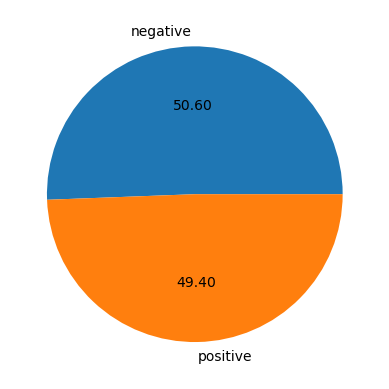

In [197]:
plt.pie(df['airline_sentiment'].value_counts(), labels=['negative','positive'],autopct="%0.2f")
plt.show()

# Feature extraction

In [198]:
df['num_characters'] = df['text'].apply(len)

C:\Users\bnsla\AppData\Local\Temp\ipykernel_14736\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [199]:
df

,text,airline_sentiment,num_characters
1,@VirginAmerica plus you've added commercials t...,1,72
6,"@VirginAmerica yes, nearly every time I fly VX...",1,79
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",1,47
9,"@VirginAmerica it was amazing, and arrived an ...",1,80
11,@VirginAmerica I &lt;3 pretty graphics. so muc...,1,83
...,...,...,...
13734,@AmericanAir I've been on hold with internatio...,0,137
8862,@JetBlue \nApparently not.,0,25
10572,@USAirways Sadly your words don't represent yo...,0,82
2207,@united and waiting,0,19


In [200]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bnsla\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [201]:
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\bnsla\AppData\Local\Temp\ipykernel_14736\1278246015.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
C:\Users\bnsla\AppData\Local\Temp\ipykernel_14736\1278246015.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_word'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [202]:
df

,text,airline_sentiment,num_characters,num_sentences,num_word
1,@VirginAmerica plus you've added commercials t...,1,72,1,13
6,"@VirginAmerica yes, nearly every time I fly VX...",1,79,1,22
8,"@virginamerica Well, I didn't…but NOW I DO! :-D",1,47,2,12
9,"@VirginAmerica it was amazing, and arrived an ...",1,80,2,19
11,@VirginAmerica I &lt;3 pretty graphics. so muc...,1,83,3,19
...,...,...,...,...,...
13734,@AmericanAir I've been on hold with internatio...,0,137,3,26
8862,@JetBlue \nApparently not.,0,25,1,5
10572,@USAirways Sadly your words don't represent yo...,0,82,2,17
2207,@united and waiting,0,19,1,4


In [203]:
df[['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,4652.000000,4652.000000,4652.000000
mean,100.665090,21.345013,2.095013
std,37.350019,7.985571,0.984071
min,12.000000,3.000000,1.000000
25%,72.000000,15.000000,1.000000
50%,110.000000,23.000000,2.000000
75%,135.000000,28.000000,3.000000
max,186.000000,47.000000,9.000000


In [204]:
df[df['airline_sentiment'] == 0][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,2354.000000,2354.000000,2354.000000
mean,113.583263,24.053101,2.098556
std,30.918990,6.838628,0.998327
min,14.000000,3.000000,1.000000
25%,95.000000,20.000000,1.000000
50%,125.000000,26.000000,2.000000
75%,138.000000,29.000000,3.000000
max,176.000000,40.000000,9.000000


In [205]:
df[df['airline_sentiment'] == 1][['num_characters','num_word','num_sentences']].describe()

,num_characters,num_word,num_sentences
count,2298.000000,2298.000000,2298.000000
mean,87.432115,18.570931,2.091384
std,38.719074,8.124010,0.969453
min,12.000000,3.000000,1.000000
25%,55.000000,12.000000,1.000000
50%,87.000000,19.000000,2.000000
75%,125.000000,25.000000,3.000000
max,186.000000,47.000000,9.000000


<Axes: xlabel='num_characters', ylabel='Count'>

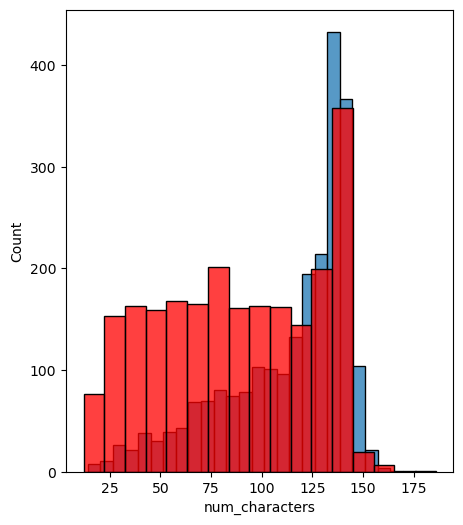

In [211]:
plt.figure(figsize=(5,6))
sns.histplot(df[df['airline_sentiment'] == 0]['num_characters'])
sns.histplot(df[df['airline_sentiment'] == 1]['num_characters'],color='red')
sns.histplot(df[df['airline_sentiment'] == 2]['num_characters'],color='green')

<Axes: xlabel='num_word', ylabel='Count'>

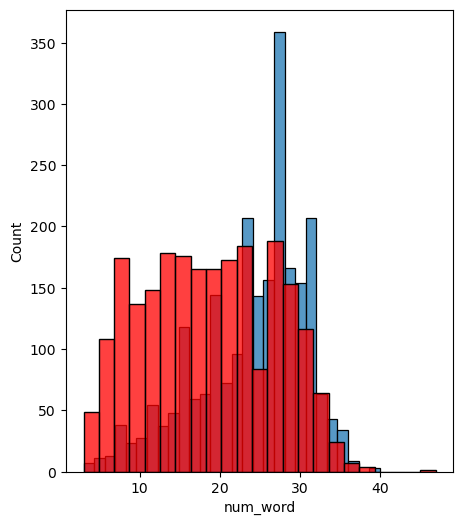

In [212]:
plt.figure(figsize=(5,6))
sns.histplot(df[df['airline_sentiment'] == 0]['num_word'])
sns.histplot(df[df['airline_sentiment'] == 1]['num_word'],color='red')
sns.histplot(df[df['airline_sentiment'] == 2]['num_word'],color='green')

C:\Users\bnsla\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


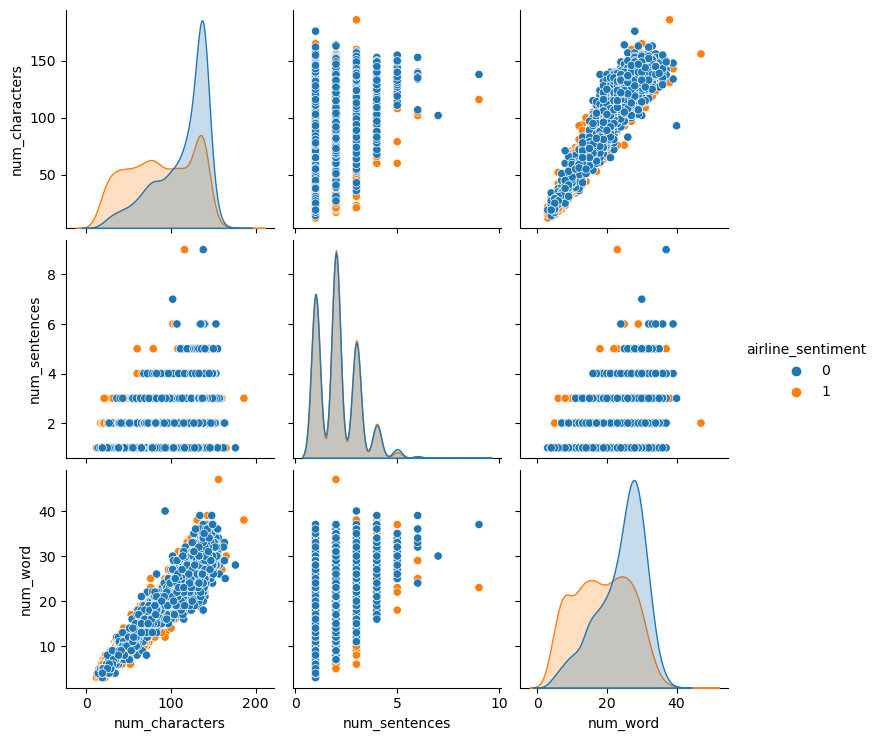

In [213]:
sns.pairplot(df,hue='airline_sentiment')

In [214]:
df.iloc[:,[2,3,4]]

,num_characters,num_sentences,num_word
1,72,1,13
6,79,1,22
8,47,2,12
9,80,2,19
11,83,3,19
...,...,...,...
13734,137,3,26
8862,25,1,5
10572,82,2,17
2207,19,1,4


<Axes: >

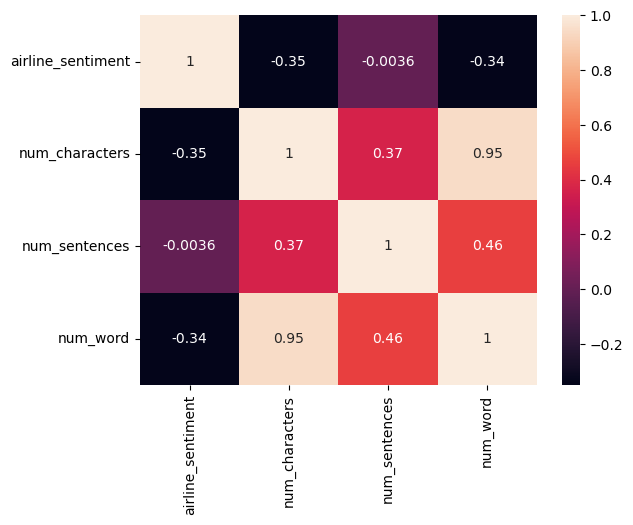

In [215]:
sns.heatmap(df.iloc[:,[1,2,3,4]].corr(),annot=True)

# 3. Data Preprocessing
* Lower case
* Tokenization
* Removing special characters
* Removing stop words and punctuation
* Stemming

In [216]:
stops = set(stopwords.words("English"))

In [217]:
def clean_text(sent):
    sent = sent.lower()
    sent = re.sub('[^a-z]'," ",sent)
    word_list = sent.split()
    final_sentence = " ".join(word_list)
    return final_sentence

In [218]:
df["text"] = df["text"].apply(clean_text)

C:\Users\bnsla\AppData\Local\Temp\ipykernel_14736\693239616.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["text"] = df["text"].apply(clean_text)


In [219]:
df

,text,airline_sentiment,num_characters,num_sentences,num_word
1,virginamerica plus you ve added commercials to...,1,72,1,13
6,virginamerica yes nearly every time i fly vx t...,1,79,1,22
8,virginamerica well i didn t but now i do d,1,47,2,12
9,virginamerica it was amazing and arrived an ho...,1,80,2,19
11,virginamerica i lt pretty graphics so much bet...,1,83,3,19
...,...,...,...,...,...
13734,americanair i ve been on hold with internation...,0,137,3,26
8862,jetblue apparently not,0,25,1,5
10572,usairways sadly your words don t represent you...,0,82,2,17
2207,united and waiting,0,19,1,4


In [220]:
X_train,X_test,Y_train,Y_test = train_test_split(df["text"],df["airline_sentiment"],test_size = 0.3,random_state = 1)

In [221]:
len(X_train)

3256

In [222]:
X_train

281                               virginamerica thank you
8888    jetblue heard about the charge for st bag and ...
8933    jetblue why is my flight delayed hours this is...
9264    usairways i m still disappointed that it is ap...
8542    jetblue my flyingitforward affects just one sm...
                              ...                        
646     united yeah sorry but there s always a problem...
1622    united rikrik what made you come to this can w...
5607    southwestair beautiful day in seattle http t c...
2903    united i get that but doing it by giving inacc...
1150    united thank you very much for the help we re ...
Name: text, Length: 3256, dtype: object

In [223]:
tf_idf = TfidfVectorizer(max_features = 5000)
#applying tf idf to training data
X_train_tf = tf_idf.fit_transform(X_train).toarray()
#applying tf idf to training data
# X_train_tf = tf_idf.transform(train_X)

In [224]:
X_test_tf = tf_idf.transform(X_test).toarray()

In [225]:
Y_train

281     1
8888    0
8933    0
9264    0
8542    1
       ..
646     0
1622    0
5607    1
2903    0
1150    1
Name: airline_sentiment, Length: 3256, dtype: int32

In [226]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [227]:
gnb.fit(X_train_tf,Y_train)
y_pred1 = gnb.predict(X_test_tf)
print(accuracy_score(Y_test,y_pred1,))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1,average = 'micro'))

0.6926934097421203
[[430 283]
 [146 537]]
0.6926934097421203


In [228]:
mnb.fit(X_train_tf,Y_train)
y_pred1 = mnb.predict(X_test_tf)
print(accuracy_score(Y_test,y_pred1,))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1,average = 'micro'))

0.8610315186246418
[[661  52]
 [142 541]]
0.8610315186246418


In [229]:
bnb.fit(X_train_tf,Y_train)
y_pred1 = bnb.predict(X_test_tf)
print(accuracy_score(Y_test,y_pred1,))
print(confusion_matrix(Y_test,y_pred1))
print(precision_score(Y_test,y_pred1,average = 'micro'))

0.8567335243553008
[[603 110]
 [ 90 593]]
0.8567335243553008


In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [231]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [232]:
clfs = {
    'SVC' : svc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [235]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred,average = 'micro')
    conf= confusion_matrix(y_test,y_pred)
    return accuracy,precision,conf

In [237]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision,confusion = train_classifier(clf, X_train_tf,Y_train,X_test_tf,Y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    print("Confusion Matrix - ",confusion)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.8724928366762178
Precision -  0.8724928366762178
Confusion Matrix -  [[641  72]
 [106 577]]
For  NB
Accuracy -  0.8610315186246418
Precision -  0.8610315186246418
Confusion Matrix -  [[661  52]
 [142 541]]
For  DT
Accuracy -  0.7406876790830945
Precision -  0.7406876790830945
Confusion Matrix -  [[570 143]
 [219 464]]
For  LR
Accuracy -  0.8488538681948424
Precision -  0.8488538681948424
Confusion Matrix -  [[619  94]
 [117 566]]
For  RF
Accuracy -  0.8330945558739254
Precision -  0.8330945558739254
Confusion Matrix -  [[618  95]
 [138 545]]
For  AdaBoost
Accuracy -  0.826647564469914
Precision -  0.826647564469914
Confusion Matrix -  [[608 105]
 [137 546]]
For  BgC
Accuracy -  0.8130372492836676
Precision -  0.8130372492836676
Confusion Matrix -  [[570 143]
 [118 565]]
For  ETC
Accuracy -  0.8424068767908309
Precision -  0.8424068767908309
Confusion Matrix -  [[632  81]
 [139 544]]
For  GBDT
Accuracy -  0.8180515759312321
Precision -  0.8180515759312321
Confusio